# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [97]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

(5, 10) (10,)
Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [107]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 8.372505e-10
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


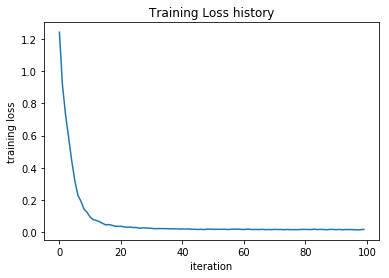

In [111]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [112]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [113]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

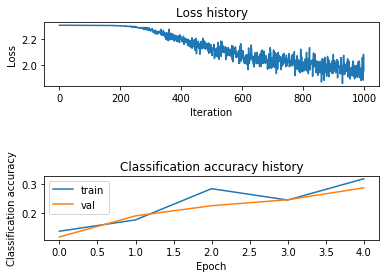

In [116]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

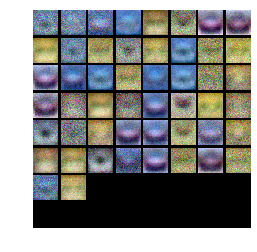

In [122]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

First I sweep along some of the best performing hyperparameter values I've seen in the past. For hyperparameters I haven't tuned in previous models, I tried values both slightly higher than and lower than the first attempt to see which direction may the best to move that parameter in.

In [125]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

regularization_strengths = [2.5e4, 5e4]
results = {}
best_val = -1 
input_size = 32 * 32 * 3
num_classes = 10
c=1

combinations = len(np.logspace(-7,-4,5))*10*len(range(30,60,10))*2
for lr in np.logspace(-7,-4,5):
    for rs in np.arange(regularization_strengths[0],regularization_strengths[1],np.diff(regularization_strengths)/10):
        for hidden_size in range(30,60,10):
            for iters in [500,1500]:
                print("Trying combination #",c,"out of", combinations,"...")
                c+=1
                
                net = TwoLayerNet(input_size, hidden_size, num_classes)

                stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=iters, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=0.25, verbose=True)

                Yt = net.predict(X_train)
                Yp = net.predict(X_val)

                t_num_correct = np.sum(Yt == y_train)
                t_accuracy = float(t_num_correct) / X_train.shape[0]

                v_num_correct = np.sum(Yp == y_val)
                v_accuracy = float(v_num_correct) / X_val.shape[0]

                results[(lr,rs,hidden_size,iters)] = (t_accuracy ,v_accuracy)

                if (best_val<v_accuracy):
                    best_val = v_accuracy
                    best_net = net
 
# Print out results.
for lr, rs, hidden_size, iters in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e hidden size %d iters %d train accuracy: %f val accuracy: %f' % (
                lr, rs, hidden_size, iters, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Trying combination # 0 out of 300 ...
iteration 0 / 500: loss 2.302799
iteration 100 / 500: loss 2.302811
iteration 200 / 500: loss 2.302817
iteration 300 / 500: loss 2.302814
iteration 400 / 500: loss 2.302807
Trying combination # 1 out of 300 ...
iteration 0 / 1000: loss 2.302830
iteration 100 / 1000: loss 2.302830
iteration 200 / 1000: loss 2.302824
iteration 300 / 1000: loss 2.302821
iteration 400 / 1000: loss 2.302817
iteration 500 / 1000: loss 2.302813
iteration 600 / 1000: loss 2.302815
iteration 700 / 1000: loss 2.302822
iteration 800 / 1000: loss 2.302815
iteration 900 / 1000: loss 2.302819
Trying combination # 2 out of 300 ...
iteration 0 / 500: loss 2.302901
iteration 100 / 500: loss 2.302907
iteration 200 / 500: loss 2.302902
iteration 300 / 500: loss 2.302899
iteration 400 / 500: loss 2.302900
Trying combination # 3 out of 300 ...
iteration 0 / 1000: loss 2.302897
iteration 100 / 1000: loss 2.302910
iteration 200 / 1000: loss 2.302886
iteration 300 / 1000: loss 2.302893
it

iteration 200 / 1000: loss 2.302905
iteration 300 / 1000: loss 2.302904
iteration 400 / 1000: loss 2.302887
iteration 500 / 1000: loss 2.302887
iteration 600 / 1000: loss 2.302886
iteration 700 / 1000: loss 2.302902
iteration 800 / 1000: loss 2.302891
iteration 900 / 1000: loss 2.302886
Trying combination # 28 out of 300 ...
iteration 0 / 500: loss 2.302988
iteration 100 / 500: loss 2.302987
iteration 200 / 500: loss 2.302983
iteration 300 / 500: loss 2.302973
iteration 400 / 500: loss 2.302950
Trying combination # 29 out of 300 ...
iteration 0 / 1000: loss 2.302971
iteration 100 / 1000: loss 2.302990
iteration 200 / 1000: loss 2.302994
iteration 300 / 1000: loss 2.302983
iteration 400 / 1000: loss 2.302980
iteration 500 / 1000: loss 2.302981
iteration 600 / 1000: loss 2.302979
iteration 700 / 1000: loss 2.302975
iteration 800 / 1000: loss 2.302994
iteration 900 / 1000: loss 2.302993
Trying combination # 30 out of 300 ...
iteration 0 / 500: loss 2.302818
iteration 100 / 500: loss 2.302

Trying combination # 54 out of 300 ...
iteration 0 / 500: loss 2.302826
iteration 100 / 500: loss 2.302827
iteration 200 / 500: loss 2.302818
iteration 300 / 500: loss 2.302808
iteration 400 / 500: loss 2.302823
Trying combination # 55 out of 300 ...
iteration 0 / 1000: loss 2.302816
iteration 100 / 1000: loss 2.302823
iteration 200 / 1000: loss 2.302823
iteration 300 / 1000: loss 2.302823
iteration 400 / 1000: loss 2.302829
iteration 500 / 1000: loss 2.302820
iteration 600 / 1000: loss 2.302833
iteration 700 / 1000: loss 2.302824
iteration 800 / 1000: loss 2.302816
iteration 900 / 1000: loss 2.302828
Trying combination # 56 out of 300 ...
iteration 0 / 500: loss 2.302896
iteration 100 / 500: loss 2.302882
iteration 200 / 500: loss 2.302889
iteration 300 / 500: loss 2.302870
iteration 400 / 500: loss 2.302913
Trying combination # 57 out of 300 ...
iteration 0 / 1000: loss 2.302871
iteration 100 / 1000: loss 2.302883
iteration 200 / 1000: loss 2.302880
iteration 300 / 1000: loss 2.30288

iteration 100 / 1000: loss 2.302893
iteration 200 / 1000: loss 2.302907
iteration 300 / 1000: loss 2.302898
iteration 400 / 1000: loss 2.302889
iteration 500 / 1000: loss 2.302893
iteration 600 / 1000: loss 2.302905
iteration 700 / 1000: loss 2.302875
iteration 800 / 1000: loss 2.302904
iteration 900 / 1000: loss 2.302893
Trying combination # 82 out of 300 ...
iteration 0 / 500: loss 2.303003
iteration 100 / 500: loss 2.303006
iteration 200 / 500: loss 2.302983
iteration 300 / 500: loss 2.302986
iteration 400 / 500: loss 2.302994
Trying combination # 83 out of 300 ...
iteration 0 / 1000: loss 2.302958
iteration 100 / 1000: loss 2.302970
iteration 200 / 1000: loss 2.302974
iteration 300 / 1000: loss 2.302962
iteration 400 / 1000: loss 2.302944
iteration 500 / 1000: loss 2.302967
iteration 600 / 1000: loss 2.302953
iteration 700 / 1000: loss 2.302972
iteration 800 / 1000: loss 2.302951
iteration 900 / 1000: loss 2.302953
Trying combination # 84 out of 300 ...
iteration 0 / 500: loss 2.30

iteration 900 / 1000: loss 2.302974
Trying combination # 108 out of 300 ...
iteration 0 / 500: loss 2.302815
iteration 100 / 500: loss 2.302805
iteration 200 / 500: loss 2.302801
iteration 300 / 500: loss 2.302801
iteration 400 / 500: loss 2.302812
Trying combination # 109 out of 300 ...
iteration 0 / 1000: loss 2.302804
iteration 100 / 1000: loss 2.302815
iteration 200 / 1000: loss 2.302816
iteration 300 / 1000: loss 2.302808
iteration 400 / 1000: loss 2.302808
iteration 500 / 1000: loss 2.302802
iteration 600 / 1000: loss 2.302818
iteration 700 / 1000: loss 2.302817
iteration 800 / 1000: loss 2.302808
iteration 900 / 1000: loss 2.302791
Trying combination # 110 out of 300 ...
iteration 0 / 500: loss 2.302888
iteration 100 / 500: loss 2.302918
iteration 200 / 500: loss 2.302904
iteration 300 / 500: loss 2.302892
iteration 400 / 500: loss 2.302892
Trying combination # 111 out of 300 ...
iteration 0 / 1000: loss 2.302904
iteration 100 / 1000: loss 2.302918
iteration 200 / 1000: loss 2.3

iteration 100 / 1000: loss 2.302892
iteration 200 / 1000: loss 2.302856
iteration 300 / 1000: loss 2.302856
iteration 400 / 1000: loss 2.302865
iteration 500 / 1000: loss 2.302849
iteration 600 / 1000: loss 2.302857
iteration 700 / 1000: loss 2.302865
iteration 800 / 1000: loss 2.302813
iteration 900 / 1000: loss 2.302858
Trying combination # 136 out of 300 ...
iteration 0 / 500: loss 2.302955
iteration 100 / 500: loss 2.302972
iteration 200 / 500: loss 2.302948
iteration 300 / 500: loss 2.302930
iteration 400 / 500: loss 2.302922
Trying combination # 137 out of 300 ...
iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302951
iteration 200 / 1000: loss 2.302939
iteration 300 / 1000: loss 2.302955
iteration 400 / 1000: loss 2.302944
iteration 500 / 1000: loss 2.302972
iteration 600 / 1000: loss 2.302917
iteration 700 / 1000: loss 2.302939
iteration 800 / 1000: loss 2.302901
iteration 900 / 1000: loss 2.302888
Trying combination # 138 out of 300 ...
iteration 0 / 500: loss 2

iteration 800 / 1000: loss 2.302941
iteration 900 / 1000: loss 2.302933
Trying combination # 162 out of 300 ...
iteration 0 / 500: loss 2.302817
iteration 100 / 500: loss 2.302807
iteration 200 / 500: loss 2.302792
iteration 300 / 500: loss 2.302801
iteration 400 / 500: loss 2.302795
Trying combination # 163 out of 300 ...
iteration 0 / 1000: loss 2.302795
iteration 100 / 1000: loss 2.302805
iteration 200 / 1000: loss 2.302796
iteration 300 / 1000: loss 2.302803
iteration 400 / 1000: loss 2.302779
iteration 500 / 1000: loss 2.302793
iteration 600 / 1000: loss 2.302773
iteration 700 / 1000: loss 2.302749
iteration 800 / 1000: loss 2.302754
iteration 900 / 1000: loss 2.302756
Trying combination # 164 out of 300 ...
iteration 0 / 500: loss 2.302902
iteration 100 / 500: loss 2.302893
iteration 200 / 500: loss 2.302897
iteration 300 / 500: loss 2.302877
iteration 400 / 500: loss 2.302881
Trying combination # 165 out of 300 ...
iteration 0 / 1000: loss 2.302897
iteration 100 / 1000: loss 2.3

iteration 400 / 500: loss 2.302741
Trying combination # 189 out of 300 ...
iteration 0 / 1000: loss 2.302866
iteration 100 / 1000: loss 2.302857
iteration 200 / 1000: loss 2.302803
iteration 300 / 1000: loss 2.302737
iteration 400 / 1000: loss 2.302727
iteration 500 / 1000: loss 2.302467
iteration 600 / 1000: loss 2.302436
iteration 700 / 1000: loss 2.302249
iteration 800 / 1000: loss 2.301965
iteration 900 / 1000: loss 2.301638
Trying combination # 190 out of 300 ...
iteration 0 / 500: loss 2.302951
iteration 100 / 500: loss 2.302916
iteration 200 / 500: loss 2.302888
iteration 300 / 500: loss 2.302860
iteration 400 / 500: loss 2.302682
Trying combination # 191 out of 300 ...
iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302909
iteration 200 / 1000: loss 2.302859
iteration 300 / 1000: loss 2.302713
iteration 400 / 1000: loss 2.302611
iteration 500 / 1000: loss 2.302621
iteration 600 / 1000: loss 2.302282
iteration 700 / 1000: loss 2.301597
iteration 800 / 1000: loss 2

iteration 500 / 1000: loss 2.302709
iteration 600 / 1000: loss 2.302295
iteration 700 / 1000: loss 2.302363
iteration 800 / 1000: loss 2.301742
iteration 900 / 1000: loss 2.301291
Trying combination # 216 out of 300 ...
iteration 0 / 500: loss 2.302810
iteration 100 / 500: loss 2.302774
iteration 200 / 500: loss 2.302732
iteration 300 / 500: loss 2.302668
iteration 400 / 500: loss 2.302671
Trying combination # 217 out of 300 ...
iteration 0 / 1000: loss 2.302827
iteration 100 / 1000: loss 2.302779
iteration 200 / 1000: loss 2.302759
iteration 300 / 1000: loss 2.302722
iteration 400 / 1000: loss 2.302675
iteration 500 / 1000: loss 2.302524
iteration 600 / 1000: loss 2.302488
iteration 700 / 1000: loss 2.302412
iteration 800 / 1000: loss 2.302058
iteration 900 / 1000: loss 2.301945
Trying combination # 218 out of 300 ...
iteration 0 / 500: loss 2.302897
iteration 100 / 500: loss 2.302881
iteration 200 / 500: loss 2.302820
iteration 300 / 500: loss 2.302777
iteration 400 / 500: loss 2.302

iteration 100 / 500: loss 2.302506
iteration 200 / 500: loss 2.298084
iteration 300 / 500: loss 2.267954
iteration 400 / 500: loss 2.215132
Trying combination # 243 out of 300 ...
iteration 0 / 1000: loss 2.302920
iteration 100 / 1000: loss 2.302484
iteration 200 / 1000: loss 2.300556
iteration 300 / 1000: loss 2.277328
iteration 400 / 1000: loss 2.214951
iteration 500 / 1000: loss 2.152277
iteration 600 / 1000: loss 2.094081
iteration 700 / 1000: loss 2.059354
iteration 800 / 1000: loss 1.989824
iteration 900 / 1000: loss 1.974424
Trying combination # 244 out of 300 ...
iteration 0 / 500: loss 2.302990
iteration 100 / 500: loss 2.302573
iteration 200 / 500: loss 2.297941
iteration 300 / 500: loss 2.264213
iteration 400 / 500: loss 2.212719
Trying combination # 245 out of 300 ...
iteration 0 / 1000: loss 2.302958
iteration 100 / 1000: loss 2.302465
iteration 200 / 1000: loss 2.296684
iteration 300 / 1000: loss 2.249926
iteration 400 / 1000: loss 2.205817
iteration 500 / 1000: loss 2.10

iteration 200 / 1000: loss 2.298357
iteration 300 / 1000: loss 2.275110
iteration 400 / 1000: loss 2.212650
iteration 500 / 1000: loss 2.111825
iteration 600 / 1000: loss 2.101344
iteration 700 / 1000: loss 2.045001
iteration 800 / 1000: loss 2.026504
iteration 900 / 1000: loss 1.911904
Trying combination # 270 out of 300 ...
iteration 0 / 500: loss 2.302799
iteration 100 / 500: loss 2.302368
iteration 200 / 500: loss 2.297721
iteration 300 / 500: loss 2.265475
iteration 400 / 500: loss 2.205117
Trying combination # 271 out of 300 ...
iteration 0 / 1000: loss 2.302816
iteration 100 / 1000: loss 2.302622
iteration 200 / 1000: loss 2.300606
iteration 300 / 1000: loss 2.286263
iteration 400 / 1000: loss 2.213382
iteration 500 / 1000: loss 2.119460
iteration 600 / 1000: loss 2.103561
iteration 700 / 1000: loss 2.053185
iteration 800 / 1000: loss 1.939741
iteration 900 / 1000: loss 2.032038
Trying combination # 272 out of 300 ...
iteration 0 / 500: loss 2.302902
iteration 100 / 500: loss 2.

iteration 900 / 1000: loss 2.071982
Trying combination # 296 out of 300 ...
iteration 0 / 500: loss 2.302884
iteration 100 / 500: loss 2.302510
iteration 200 / 500: loss 2.299738
iteration 300 / 500: loss 2.260813
iteration 400 / 500: loss 2.209596
Trying combination # 297 out of 300 ...
iteration 0 / 1000: loss 2.302875
iteration 100 / 1000: loss 2.302565
iteration 200 / 1000: loss 2.299650
iteration 300 / 1000: loss 2.258662
iteration 400 / 1000: loss 2.204248
iteration 500 / 1000: loss 2.117691
iteration 600 / 1000: loss 2.117397
iteration 700 / 1000: loss 2.086723
iteration 800 / 1000: loss 1.994921
iteration 900 / 1000: loss 2.032653
Trying combination # 298 out of 300 ...
iteration 0 / 500: loss 2.302936
iteration 100 / 500: loss 2.302352
iteration 200 / 500: loss 2.296043
iteration 300 / 500: loss 2.257292
iteration 400 / 500: loss 2.188703
Trying combination # 299 out of 300 ...
iteration 0 / 1000: loss 2.302956
iteration 100 / 1000: loss 2.302418
iteration 200 / 1000: loss 2.2

ValueError: too many values to unpack (expected 2)

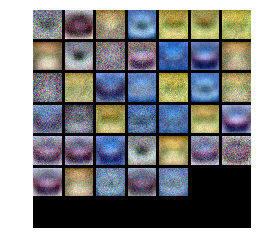

In [127]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [128]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.291


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

